In [1]:
import torch
from torchvision import datasets,transforms
import helper
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
trainset=datasets.FashionMNIST('~/.pytorch/F_MNIST_data/',download=True,train=True,transform=transform)
trainloader=torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)
image,label=next(iter(trainloader))
helper.imshow(image[0,:]);


In [2]:
from torch import nn,optim
import torch.nn.functional as F


In [3]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.r1=nn.Linear(784,256)
        self.r2=nn.Linear(256,128)
        self.r3=nn.Linear(128,64)
        self.r4=nn.Linear(64,10)
    def forward(self,x):
        x=x.view(x.shape[0],-1)
        x=F.relu(self.r1(x))
        x=F.relu(self.r2(x))
        x=F.relu(self.r3(x))
        x=F.log_softmax(self.r4(x),dim=1)
        return x

In [4]:
#train the modal
model=Classifier()
criterian=nn.NLLLoss()
optimizer=optim.Adam(model.parameters(),lr=0.003)


In [5]:
epochs=6
for e in range(epochs):
    running_loss=0
    for images,labels in trainloader:
        log_ps=model(images)
        loss=criterian(log_ps,labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss+=loss.item()
    else:
        print(f"training loss:{running_loss/len(trainloader)}")


training loss:0.5153340709838532
training loss:0.3953364433478445
training loss:0.3579059373785946
training loss:0.3327308793041879
training loss:0.3140907805484495


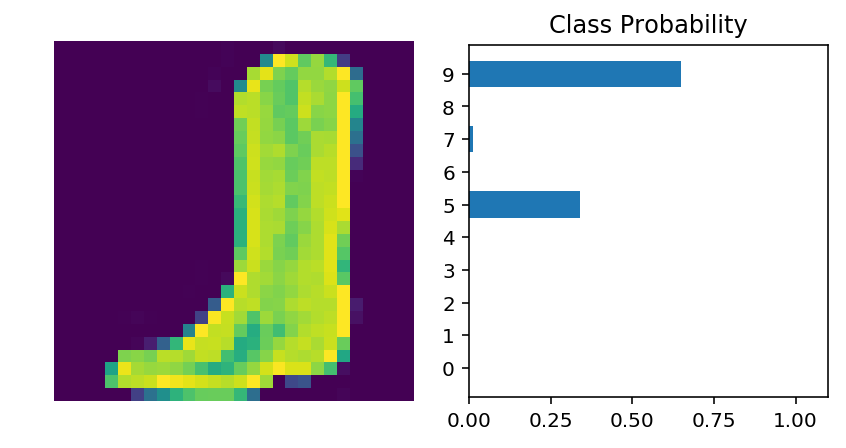

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
import helper
dataiter=iter(testloader)
images,labels=dataiter.next()
img=images[1]
out=torch.exp(model(img))
helper.view_classify(img,out,version='Faishion')
